In [38]:
from analysis.read_logs import load_benchmark_log, load_benchmark_dir
import duckdb
import matplotlib.pyplot as plt

In [39]:
data = load_benchmark_dir("/Users/arc/iavl-bench-data/run-mixed-large2")

In [40]:
def calculate_batch_ops_per_sec(versions_df, batch_size=100):
    """Calculate ops_per_sec for every batch_size versions by summing counts and durations."""
    return duckdb.sql(f"""
        SELECT 
            CEIL(version / {batch_size}.0) * {batch_size} as version,
            SUM(count) / (SUM(duration) / 1000000000.0) as ops_per_sec
        FROM versions_df
        GROUP BY CEIL(version / {batch_size}.0)
        ORDER BY version
    """).pl()

In [41]:
# Apply the function to each benchmark dataset
batch_results = {}
for benchmark in data:
    batch_results[benchmark.name] = calculate_batch_ops_per_sec(benchmark.versions_df)

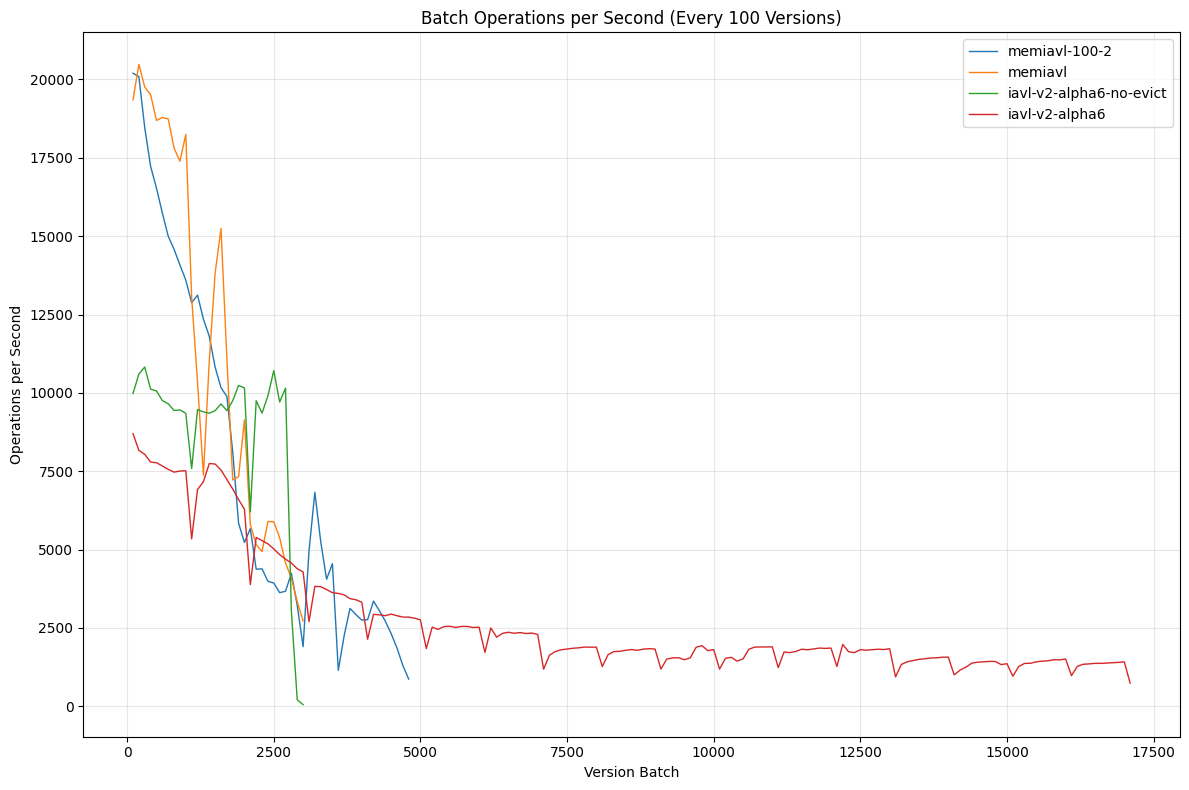

In [42]:
# Create line chart
plt.figure(figsize=(12, 8))

for name, df in batch_results.items():
    plt.plot(df['version'], df['ops_per_sec'], label=name, linewidth=1)

plt.xlabel('Version Batch')
plt.ylabel('Operations per Second')
plt.title('Batch Operations per Second (Every 100 Versions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

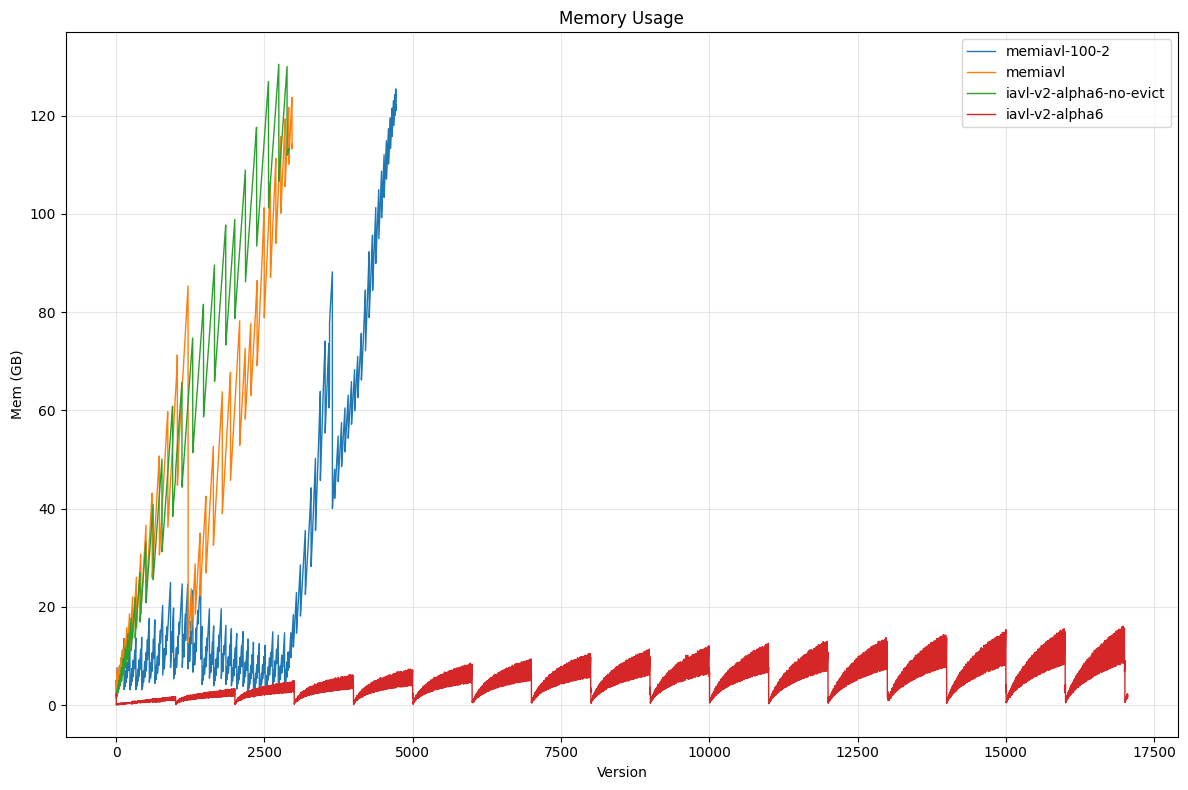

In [43]:
plt.figure(figsize=(12, 8))

for d in data:
    df = d.versions_df
    plt.plot(df['version'], df['mem_gb'], label=d.name, linewidth=1)

plt.xlabel('Version')
plt.ylabel('Mem (GB)')
plt.title('Memory Usage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
